In [2]:
%load_ext autoreload

%autoreload 2

from countrycrab import solver
import os
import matplotlib.pyplot as plt
import numpy as np
os.environ["CUDA_VISIBLE_DEVICES"]="1,2,3,4,5,6,7"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Example 1: pass to the solver just the instance path

In [7]:
module_path = os.path.abspath(os.path.join(".."))
config = {'instance': module_path +'/data/datasets/3sat/uf20-91/uf20-03.cnf',          
          'heuristic': 'walksat_g',
         'compiler':'compile_walksat_g',
         'noise':0.7,
          'max_runs':100}

In [3]:
%%time
p_vs_it_g, violated_constr_mat, inputs, (ts_g, p_vs_t_g) = solver.solve(config = config,params = config)

CPU times: user 3.6 s, sys: 730 ms, total: 4.33 s
Wall time: 4.35 s


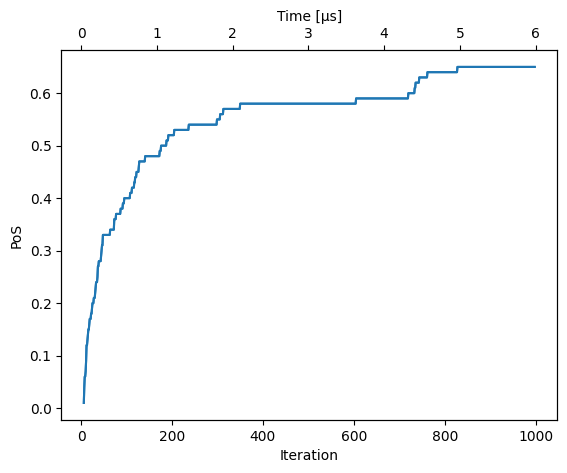

In [6]:
fig, ax = plt.subplots()
twinax = ax.twiny()

ax.plot(p_vs_it_g)
ax.set_xlabel("Iteration")
ax.set_ylabel("PoS")

twinax.plot(ts_g * 1e6, p_vs_t_g)
twinax.set_xlabel("Time [µs]");

In [24]:
module_path = os.path.abspath(os.path.join(".."))
config = {'instance': module_path +'/data/datasets/uf50-218/uf50-01.cnf',  
          'netlist_dir': module_path+'/data/vpr_netlist/',
          'heuristic': 'walksat_g',
         'compiler':'compile_walksat_g',
          'num_wta_inputs':17,
         'noise':0.7}
params = {'max_runs':200,
         'noise_distribution':'normal',
         'scheduling':'fill_first'}

In [11]:
%%time
p_vs_it_m, violated_constr_mat, inputs, _ = solver.solve(config = config,params = params)

CPU times: user 15 s, sys: 82.2 ms, total: 15.1 s
Wall time: 15.1 s


In [12]:
module_path = os.path.abspath(os.path.join(".."))
config = {'instance': module_path +'/data/datasets/uf50-218/uf50-01.cnf',  
          'netlist_dir': module_path+'/data/vpr_netlist/',
          'heuristic': 'walksat_g',
         'compiler':'compile_walksat_g',
          'num_wta_inputs':17,
         'noise':0.7}
params = {'max_runs':200,
         'noise_distribution':'normal',
         'scheduling':'vpr'}

In [13]:
%%time
p_vs_it_m, violated_constr_mat, inputs, _ = solver.solve(config = config,params = params)

CPU times: user 12.6 s, sys: 0 ns, total: 12.6 s
Wall time: 12.6 s


In [9]:
plt.plot(p_vs_it_m[0:-1])
plt.plot(p_vs_it_g[0:-1])
plt.xlabel('Iteration')
plt.ylabel('Solution probability')

NameError: name 'p_vs_t_m' is not defined

Text(0, 0.5, 'Number of violated clauses')

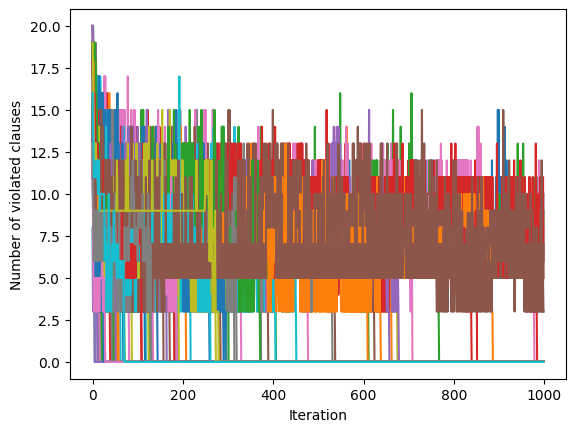

In [55]:
for run in violated_constr_mat:
    plt.plot(run)
plt.xlabel('Iteration')
plt.ylabel('Number of violated clauses')

### Example 2: specify number of experiments and noise value

In [59]:
module_path = os.path.abspath(os.path.join(""))
config = {'instance': module_path +'/data/uf20-91/uf20-01.cnf',
         'noise': 0.8}
params = {'max_runs': 250,  #number of of parallel runs
         'max_flips': 500} #number of flips in a single run

In [60]:
p_vs_it, violated_constr_mat, inputs, _ = solver.solve(config = config,params = params)

Text(0, 0.5, 'Solution probability')

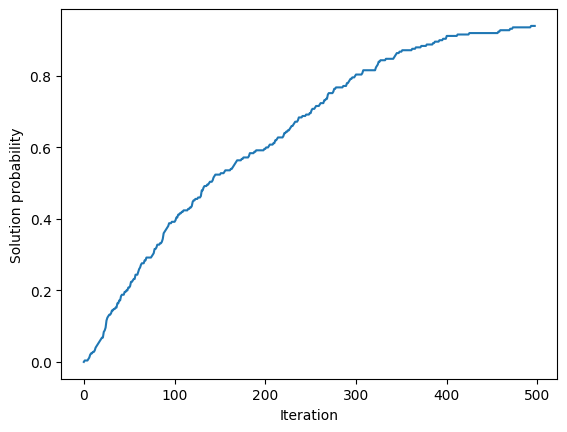

In [61]:
plt.plot(p_vs_it[0:-1])
plt.xlabel('Iteration')
plt.ylabel('Solution probability')